<a href="https://colab.research.google.com/github/yh08037/gnbai20201/blob/master/lab5/gnbai_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def load_iris_data(split_rate=0.7):

    # read file
    path = "/content/iris.csv"
    column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
    data_pd = pd.read_csv(path, names=column_names)

    # data_np = np.asarray(data_pd)
    data_np = data_pd.values

    # shuffle data
    np.random.shuffle(data_np)

    # define x
    x = data_np[:, :4].astype(np.float)

    # define y as one-hot encoding
    names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    labels = data_np[:, 4]
    y = np.asarray([[name==label for name in names] for label in labels], dtype=np.int)

    # train-test split
    train_size = int(len(data_np) * split_rate)
    test_size = len(data_np) - train_size

    x_train = x[:train_size]
    x_test  = x[-test_size:]

    y_train = y[:train_size]
    y_test  = y[-test_size:]

    # clear memory
    del data_pd, data_np, x, y, labels

    return x_train, y_train, x_test, y_test

In [ ]:
x_train, y_train, x_test, y_test = load_iris_data()

## 2. Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# optimizer : 파라미터를 최적화하는 방법 (ex 경사하강법, 확률적 경사하강법, ...)
# loss : 오차함수 error = 비용 cost = 손실 loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

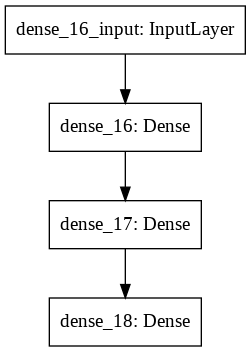

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 18        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 3.5714 - accuracy: 0.3048
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 3.4258 - accuracy: 0.3048
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 3.2830 - accuracy: 0.3048
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 3.1489 - accuracy: 0.3048
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 3.0189 - accuracy: 0.3048
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 2.8999 - accuracy: 0.3048
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 2.7828 - accuracy: 0.3048
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 2.6768 - accuracy: 0.3048
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 2.5746 - accuracy: 0.3048
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 2.4819 - accuracy: 0.3048
Epoch 11/100
4/4 [===========

In [ ]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.9556


[0.4653421938419342, 0.9555555582046509]